In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Step 1: Collect image paths and metadata into a DataFrame
def collect_image_paths(root_dir):
    data = []
    
    # Walk through each directory
    for class_folder in os.listdir(root_dir):
        class_path = os.path.join(root_dir, class_folder)
        print(class_path)
        if os.path.isdir(class_path):
            for split in ['Train', 'Test']:
                split_path = os.path.join(class_path, split)
                
                if os.path.isdir(split_path):
                    for image_name in os.listdir(split_path):
                        image_path = os.path.join(split_path, image_name)
                        data.append({
                            'path': image_path,
                            'target': class_folder,
                            'split': split
                        })
    
    return data

# Set the root directory of your dataset
root_dir = "D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification"

# Collect the data
data = collect_image_paths(root_dir)

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Avulsion fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Comminuted fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Fracture Dislocation
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Greenstick fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Hairline Fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Impacted fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Longitudinal fracture
D:\Learnings\Machinester Program May'24\Projects\Bone Break Classification\Bone Break Classification\Oblique fracture
D:\Learnings\Machinester Program May'2

In [4]:
df.split.value_counts()

split
Train    987
Test     140
Name: count, dtype: int64

In [5]:
df.target.value_counts()

target
Fracture Dislocation     156
Comminuted fracture      148
Pathological fracture    134
Avulsion fracture        123
Greenstick fracture      122
Hairline Fracture        111
Spiral Fracture           86
Impacted fracture         84
Oblique fracture          84
Longitudinal fracture     79
Name: count, dtype: int64

In [6]:
# Create a Image Data generator for Keras TensorFlow CNN model

# Define parameters
batch_size = 10
img_height = 256  # Change as needed
img_width = 256   # Change as needed

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
)

# Create data loaders
train_generator = datagen.flow_from_dataframe(
    dataframe=df[df['split'] == 'Train'],
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=df[df['split'] == 'Test'],
    x_col='path',
    y_col='target',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'  # For multi-class classification
)

# Verify the data loaders
print(f'Train samples: {train_generator.samples}')
print(f'Validation samples: {validation_generator.samples}')

Found 987 validated image filenames belonging to 10 classes.
Found 140 validated image filenames belonging to 10 classes.
Train samples: 987
Validation samples: 140


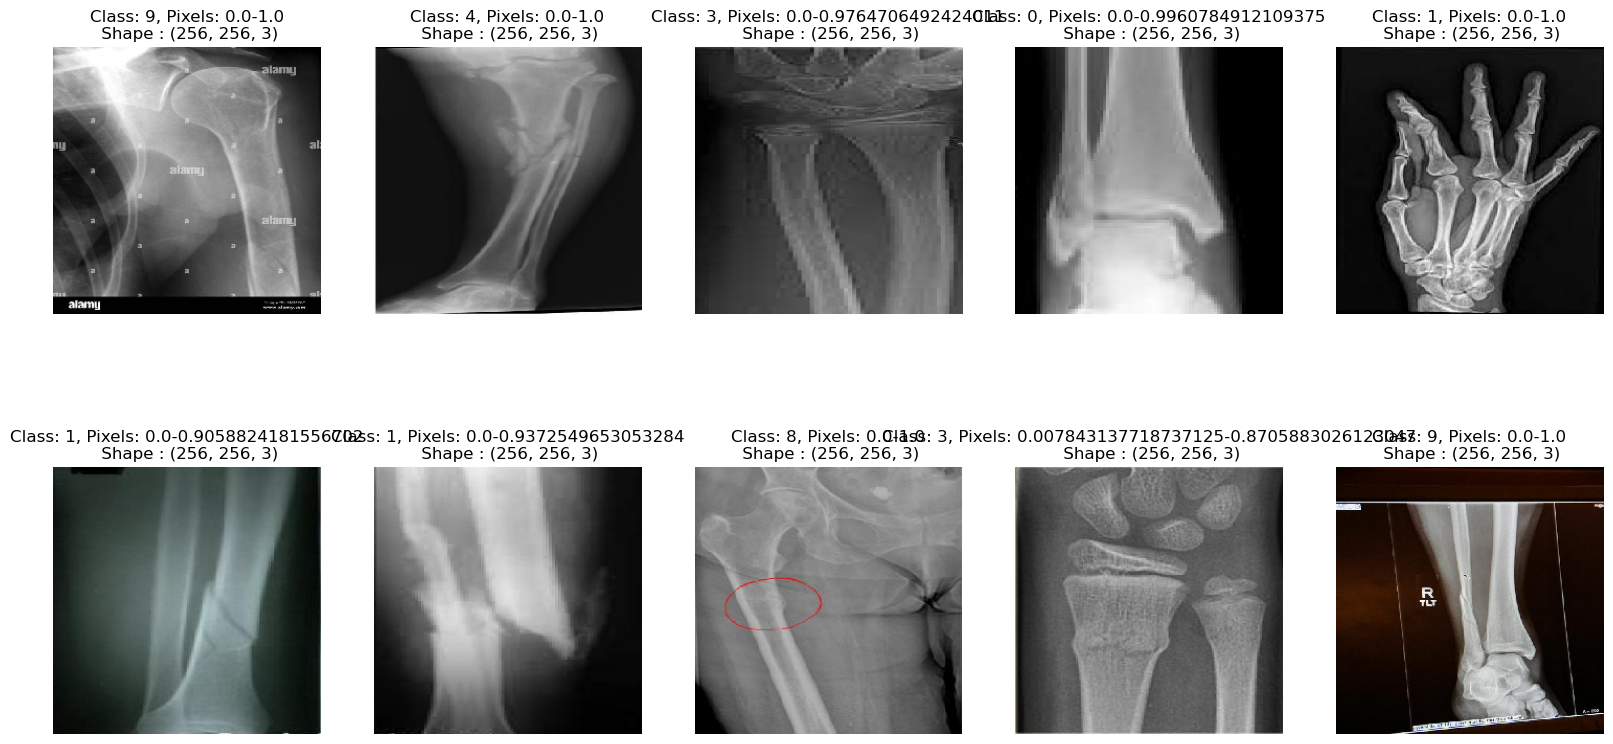

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot images
def plot_images(generator, num_images=10):
    images, labels = next(generator)
    plt.figure(figsize=(20, 10))
    
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {np.argmax(labels[i])}, Pixels: {images[i].min()}-{images[i].max()}\n Shape : {images[i].shape}")
        plt.axis('off')
    
    plt.show()

# Plot random images from the training data
plot_images(train_generator, num_images=10)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

# Define a simple CNN model
model = Sequential([
    Input(shape=(256, 256, 3)),  # Explicitly define the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,840,266 (56.61 MB)

 Trainable params: 14,840,266 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5


C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


99/99 ━━━━━━━━━━━━━━━━━━━━ 93s 898ms/step - accuracy: 0.1281 - loss: 2.4646 - val_accuracy: 0.1643 - val_loss: 2.2804
Epoch 2/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 80s 805ms/step - accuracy: 0.1939 - loss: 2.2389 - val_accuracy: 0.1500 - val_loss: 2.3025
Epoch 3/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 84s 843ms/step - accuracy: 0.2446 - loss: 2.1364 - val_accuracy: 0.1786 - val_loss: 2.2701
Epoch 4/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 89s 893ms/step - accuracy: 0.3226 - loss: 1.8955 - val_accuracy: 0.2000 - val_loss: 2.2707
Epoch 5/5
99/99 ━━━━━━━━━━━━━━━━━━━━ 83s 828ms/step - accuracy: 0.4523 - loss: 1.6141 - val_accuracy: 0.1857 - val_loss: 2.3323


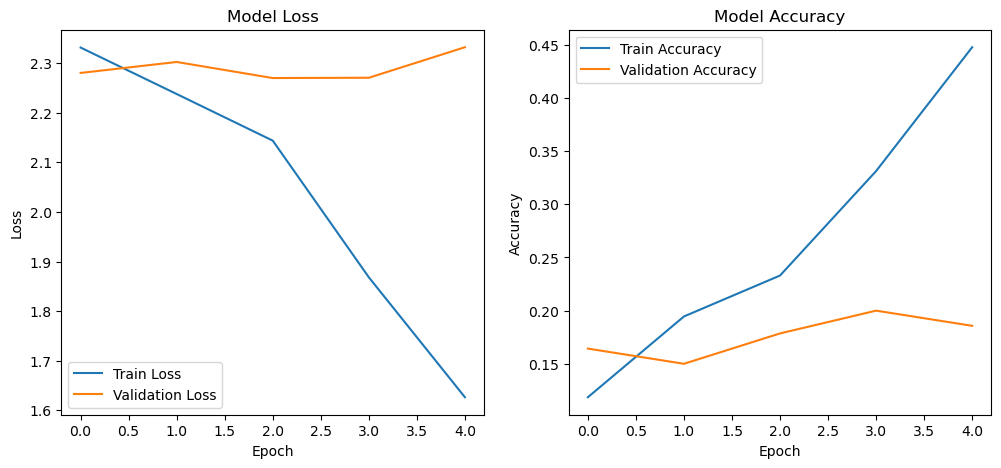

In [9]:
import matplotlib.pyplot as plt

# Ensure generators are reset before training
validation_generator.reset()
train_generator.reset()

# Train the model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=5,
    verbose=1
)

# Plot training & validation loss values
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step
Accuracy: 0.07


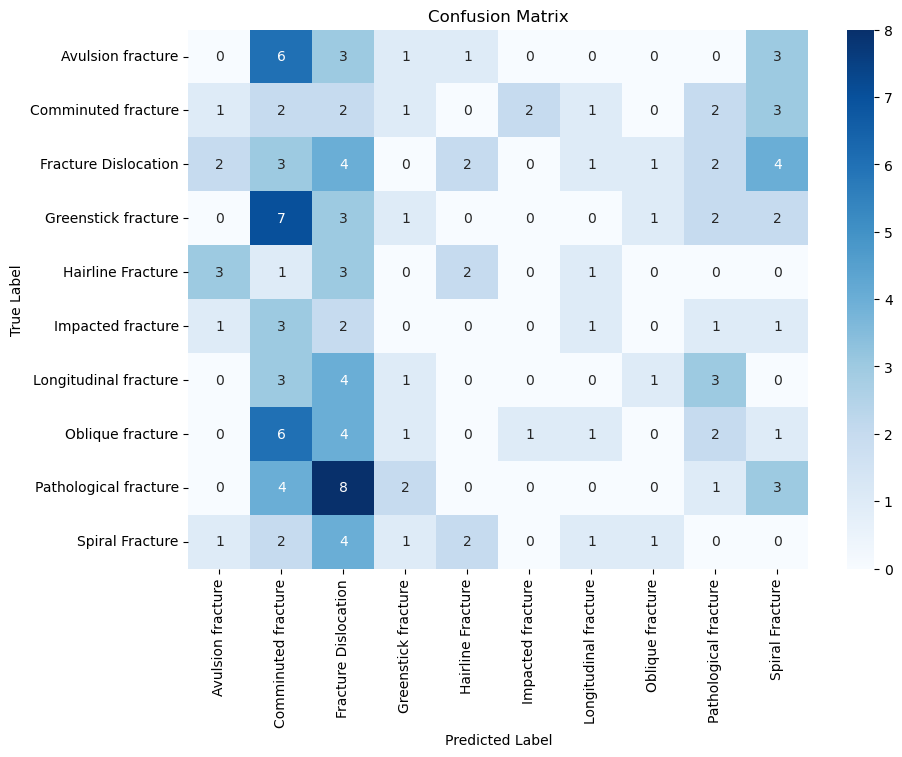

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the validation set
validation_generator.reset()
predictions = model.predict(validation_generator)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_labels = validation_generator.classes

# Compute accuracy
accuracy = accuracy_score(true_labels, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()